<a href="https://colab.research.google.com/github/srkleon/DataScience/blob/main/Advanced_operations_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reshaping

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
a = tf.Variable([[1,2,3],[4,5,6],[7,8,9]],dtype = tf.float32)
a.numpy()

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

In [4]:
print("reshaped tensor : " , tf.reshape(a,(1,9)).numpy())

reshaped tensor :  [[1. 2. 3. 4. 5. 6. 7. 8. 9.]]


In [5]:
try:
  a_reshape= tf.reshape(a,(4,3))
except Exception as e:
  print("Exception raised while reshaping:\n", str(e))


Exception raised while reshaping:
 {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 9 values, but the requested shape has 12 [Op:Reshape]


In [6]:
tf.reduce_sum(a,axis = 1).shape

TensorShape([3])

In [7]:
b = tf.Variable([[[[1,2,3]]]],dtype= tf.float32)
b.numpy()

array([[[[1., 2., 3.]]]], dtype=float32)

In [8]:
b.shape


TensorShape([1, 1, 1, 3])

In [9]:

c = b*a
c.numpy()

array([[[[ 1.,  4.,  9.],
         [ 4., 10., 18.],
         [ 7., 16., 27.]]]], dtype=float32)

In [10]:
c.shape

TensorShape([1, 1, 3, 3])

In [11]:
d = tf.Variable([1,2,3],dtype=tf.float32)
d

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [12]:
d = tf.expand_dims(d,axis=0)
d

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>

In [13]:
tf.reshape(a,[1,3,1,3]).numpy()

array([[[[1., 2., 3.]],

        [[4., 5., 6.]],

        [[7., 8., 9.]]]], dtype=float32)

Gradient

In [14]:
x = tf.Variable([-2],dtype = tf.float32)

with tf.GradientTape() as tape:
  y = (3*tf.pow(x,3)) + (5*tf.pow(x,2)) - (3*x) + 10

dx_dy = tape.gradient(y,x)
dx_dy.numpy()

array([13.], dtype=float32)

In [15]:
x= tf.Variable([10],dtype=tf.float32)

with tf.GradientTape() as tape:
  y = tf.pow(3,0.2*x) + 5*tf.pow(x,2) - np.log(x) + tf.nn.tanh(x)

dx_dy = tape.gradient(y,x)
dx_dy.numpy()

array([101.9775], dtype=float32)

In [16]:
x = tf.Variable((10), dtype=tf.float32)
with tf.GradientTape() as tape:
  y = tf.pow(3, 0.2 * x) + 5* tf.pow(x,2) - tf.math.log(x) + tf.math.tanh (x)
dy_dx = tape.gradient(y,x)
print("The slope of the function at x = 10 is ", dy_dx.numpy())

The slope of the function at x = 10 is  101.8775


In [17]:
x = tf.Variable([5],dtype = tf.float32)
with tf.GradientTape(persistent=True) as tape:
  t = tf.pow((tf.pow(x,0.3) + 0.1),0.5)
  p = tf.exp(4*t)
  q = tf.pow(p,2) - 4*p
grad_p = tape.gradient(p,x)
grad_q = tape.gradient(q,x)
print(grad_p.numpy(),grad_q.numpy())

[28.167446] [10590.189]


In [18]:
x = tf.Variable([3],dtype = tf.float32,trainable =True)
y = tf.Variable([4],dtype = tf.float32,trainable =False)
with tf.GradientTape() as tape:
  p = x**2 + y**2

try:
  dp_dx,dp_dy = tape.gradient(p,[x,y])
  print(dp_dx.numpy())
  print(dp_dy.numpy())
except Exception as e:
  print("exception : ", str(e))

[6.]
exception :  'NoneType' object has no attribute 'numpy'


Minimising Funtion

In [51]:
"""
1. initialize x
2. compute the gradient dy_dx
3. compute updated x
4. calculate y after updating x
5. check tolerance
6. stopping criteria
"""


x  = tf.Variable(tf.random.normal((1,)))
x

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.01611193], dtype=float32)>

In [52]:
lr = tf.constant(0.1)
tolerance = 1.
y_prev = x**2 -4
x_values=[]
y_values=[]
num_iters =[]
for  i in range(10):
  print("x , y_prev : " , x.numpy()[0], y_prev.numpy()[0])
  with tf.GradientTape() as tape:
    y = 7* x**2 - 4*x +10
  dy_dx = tape.gradient(y,x)

  x.assign( x - (lr * dy_dx))

  y_new = 7* x**2 - 4*x +10
  x_values.append(x.numpy()[0])
  y_values.append(y_new.numpy()[0])
  num_iters.append(i)
  print("x , y_new : " , x.numpy()[0], y_new.numpy()[0])

  delta = tf.abs(((y_new - y_prev) * 100./y_prev).numpy()[0])
  print("delta : ", delta)
  """if delta  <= tolerance:
    print("Exiting Loop")
    break
  else :"""
  y_prev = y_new

x , y_prev :  0.016111935 -3.9997404
x , y_new :  0.39355522 9.509979
delta :  tf.Tensor(337.7649, shape=(), dtype=float32)
x , y_prev :  0.39355522 9.509979
x , y_new :  0.2425779 9.441597
delta :  tf.Tensor(0.719058, shape=(), dtype=float32)
x , y_prev :  0.2425779 9.441597
x , y_new :  0.30296886 9.4306555
delta :  tf.Tensor(0.115886174, shape=(), dtype=float32)
x , y_prev :  0.30296886 9.4306555
x , y_new :  0.27881247 9.428905
delta :  tf.Tensor(0.018566536, shape=(), dtype=float32)
x , y_prev :  0.27881247 9.428905
x , y_new :  0.288475 9.428625
delta :  tf.Tensor(0.0029635106, shape=(), dtype=float32)
x , y_prev :  0.288475 9.428625
x , y_new :  0.28461 9.42858
delta :  tf.Tensor(0.0004753895, shape=(), dtype=float32)
x , y_prev :  0.28461 9.42858
x , y_new :  0.286156 9.428573
delta :  tf.Tensor(8.091774e-05, shape=(), dtype=float32)
x , y_prev :  0.286156 9.428573
x , y_new :  0.2855376 9.428572
delta :  tf.Tensor(1.0114726e-05, shape=(), dtype=float32)
x , y_prev :  0.2855376

In [48]:
import matplotlib.pyplot as plt


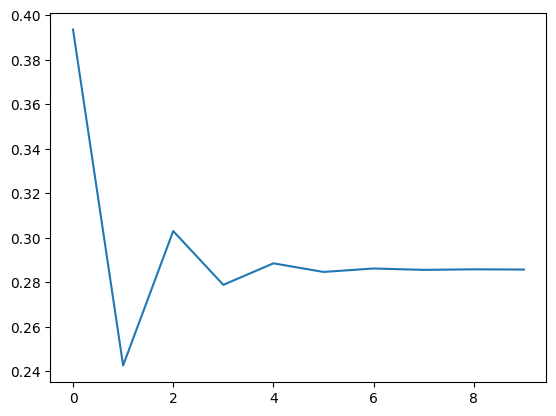

In [53]:
plt.plot(num_iters, x_values)

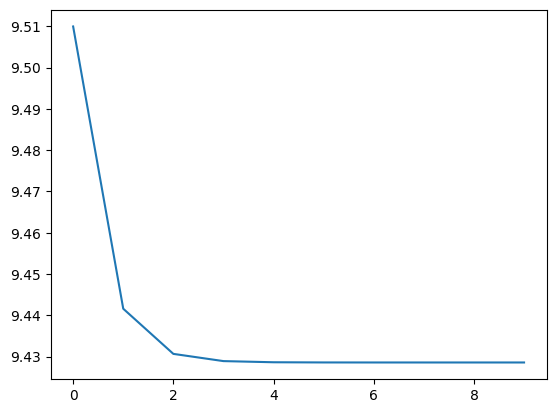

In [54]:
plt.plot(num_iters,y_values)